<a href="https://colab.research.google.com/github/ahkhaniki/spark-machine-learning/blob/main/spark-elasticsearch-iInformation-retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Cassandra and Elasticsearch for Data Processing**

---
- Course: Big Data
- Topic: Data processing on the dataset of books
- Type: Data Engineering
- Author: Amir Hussein Khaniki
- URL: https://github.com/ahkhaniki/spark-machine-learning

---

#**Introduction**


Data engineering is the process of designing, building, and maintaining data pipelines that can handle large-scale, complex, and diverse data sources. Data engineering enables data analysis, machine learning, and data visualization by transforming raw data into useful and accessible formats. Spark, Cassandra, Elasticsearch, and Kibana are some of the popular tools and technologies that data engineers use to create and manage data pipelines.

Apache Spark is an open-source distributed computing framework that can process large amounts of data in parallel using clusters of machines. Spark supports multiple programming languages, such as Scala, Python, Java, and R, and provides libraries for various tasks, such as SQL, streaming, graph processing, and machine learning.

Apache Cassandra is an open-source distributed database system that can store and query large amounts of structured and semi-structured data across multiple nodes. Cassandra is designed to be highly scalable, fault-tolerant, and consistent. Cassandra supports a wide range of data types, such as strings, numbers, lists, maps, sets, and user-defined types.

Elasticsearch is an open-source distributed search and analytics engine that can index and query large amounts of unstructured and semi-structured data in near real-time. Elasticsearch supports full-text search, aggregations, geospatial queries, synonyms, suggestions, and more. Elasticsearch also integrates with machine learning capabilities to detect anomalies and outliers in the data.

Kibana is an open-source data visualization plugin for Elasticsearch that can create interactive dashboards and charts to explore and present the data. Kibana supports various types of visualizations, such as histograms, pie charts, maps, heatmaps, gauges, tables, and more. Kibana also allows users to create custom visualizations using Vega or Timelion.

Together, these tools can form a powerful data engineering stack that can handle diverse data sources and support various data analysis and visualization needs. Right now, we are going to learn how to use them.

##**Problem Statement**
Our dataset contains bibliographic information that data should be stored and read in Elasticsearch. Then the data are needed to transfer to Cassandra and some aggregate functions are executed on them.

#**Prerequisites**
Before processing the data, we should set up a few things before we get started.

Therefore, we install following prerequisites:

1. Java 8
2. Apache Spark (including Hadoop) & FindSpark (used to locate the Apache Spark in the system)
3. PySpark (used as an interface for Spark in Python instead of standalone Apache Spark)
4. Apache Cassandra
5. Elasticsearch & Kibana


Since, several system environment variables need to be defined for the programs to work correctly, we use the `os` library.

Python OS module provides the facility to establish the interaction between the user and the operating system. It offers many useful OS functions that are used to perform OS-based tasks and get related information about operating system. The Python OS module lets us work with the files and directories.

In [ ]:
import os

##**Java (JDK)**

The Java JDK is essential to correctly run Java applications on various platforms . The JDK also supports the OpenJDK community, which is an open source project that develops and maintains the Java SE.

In [ ]:
# install java, it is not needed if installed
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

After installing Java (JDK), we need to define `JAVA_HOME` variable for Java Virtual Machine (JVM).

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

##**Spark**
Since Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, our first task is to download Java. As well as, we can install and set up the Spark environment on Google Colab via PySpark by manual method (using download) or automated method (using pip).

PySpark is a Python Spark framework for executing Python programs employing Apache Spark capabilities. PySpark is widely used in the Data Science and Machine Learning industry since many popular data science libraries are written in Python, such as NumPy and TensorFlow. It's also popular since it can handle enormous datasets quickly. The next step of this PySpark pipeline project is to read the streaming data from the Kafka topic and perform some operations on it using PySpark. Once the data has been processed, it is streamed into the output Kafka topic.


###Method 1
Installing and configuring Spark manually.

In [ ]:
# download and install spark
!wget -q https://archive.apache.org/dist/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
# unzip the spark file to the current folder
!tar -xvf spark-3.3.2-bin-hadoop3.tgz
# rename for user-friendly and better readability
!mv spark-3.3.2-bin-hadoop3 spark

In [ ]:
!ls

In [ ]:
! du -sh

Now, we need to set following environment variable for Spark.

In [ ]:
# set spark path to system path environment
os.environ["SPARK_HOME"] = "/content/spark"

In [ ]:
# install libraries related to find Spark
!pip install -q findspark

###Method 2
Installing and configuring Spark using pipe and PySpark library.

In [ ]:
# install libraries related to work with Spark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


##**Cassandra**

Apache Cassandra is a highly-scalable partitioned row store. Cassandra  or Kassandra, in Greek mythology, the daughter of Priam, the last king of Troy, and his wife Hecuba.

Partitioning means that Cassandra can distribute your data across multiple machines in an application-transparent matter. Cassandra will automatically repartition as machines are added and removed from the cluster.

Row store means that like relational databases, Cassandra organizes data by rows and columns. Rows are organized into tables with a required primary key.

The Cassandra Query Language (CQL) is a close relative of SQL, but there were following limitations in the beginning of the CQL:

* CQL does not support aggregation queries like max, min, avg
* CQL does not support group by, having queries.
* CQL does not support joins.
* CQL does not support OR queries.
* CQL does not support wildcard queries.
* CQL does not support Union, Intersection queries.
* Table columns cannot be filtered without creating the index.
* Greater than (>) and less than (<) query is only supported on clustering column.

Thus, CQL was not initially suitable for analytics purposes because it had so many limitations.

Some limitations and inabilities were removed in version 3 and later. Some views do not consider CQL suitable for analytical work, although some of its proponents argue that it has the appropriate capability for analytical tasks.



In other words, CQL is mainly designed for querying and manipulating data in Apache Cassandra, which is a distributed database system that can handle large amounts of data across many servers. CQL is not a full-fledged analytical language, but it does have some features that can support analytics purposes, such as:

*  Aggregation functions, such as count, sum, avg, min, max, etc.
*  User-defined functions and aggregates, which allow we to create custom logic and calculations on data.
*  JSON support, which allows we to query and insert data in JSON format.
*  Materialized views, which allow we to create denormalized tables that are automatically updated from a base table.

However, CQL also has some limitations and challenges for analytics purposes, such as:

*  Partition size limitations, which require we to design wer tables carefully to avoid having too many rows or columns in a single partition.
*  Data redundancy, which can result from duplicating data in multiple tables for query performance or replication purposes.
*  Application-side joins, which can be costly and complex when we need to query data from multiple tables that are not denormalized.
*  Lightweight transactions, which can affect performance and consistency when we need to ensure atomicity and isolation of operations.

Therefore, CQL is suitable for analytics purposes if we have simple and well-defined queries that can leverage the features of Cassandra and CQL. However, if we have complex and ad-hoc queries that require more flexibility and functionality, we may need to use other tools or languages that are more specialized for analytics purposes.


In [ ]:
# download and install cassandra
!wget -q https://archive.apache.org/dist/cassandra/4.0.9/apache-cassandra-4.0.9-bin.tar.gz
# unzip the cassandra file to the current folder
!tar -xzvf apache-cassandra-4.0.9-bin.tar.gz
# rename for user-friendly and better readability
!mv apache-cassandra-4.0.9 cassandra

apache-cassandra-4.0.9/bin/
apache-cassandra-4.0.9/conf/
apache-cassandra-4.0.9/conf/triggers/
apache-cassandra-4.0.9/doc/
apache-cassandra-4.0.9/doc/cql3/
apache-cassandra-4.0.9/lib/
apache-cassandra-4.0.9/lib/sigar-bin/
apache-cassandra-4.0.9/pylib/
apache-cassandra-4.0.9/pylib/cqlshlib/
apache-cassandra-4.0.9/pylib/cqlshlib/test/
apache-cassandra-4.0.9/pylib/cqlshlib/test/config/
apache-cassandra-4.0.9/tools/
apache-cassandra-4.0.9/tools/bin/
apache-cassandra-4.0.9/tools/lib/
apache-cassandra-4.0.9/CASSANDRA-14092.txt
apache-cassandra-4.0.9/CHANGES.txt
apache-cassandra-4.0.9/LICENSE.txt
apache-cassandra-4.0.9/NEWS.txt
apache-cassandra-4.0.9/NOTICE.txt
apache-cassandra-4.0.9/conf/README.txt
apache-cassandra-4.0.9/conf/cassandra-env.sh
apache-cassandra-4.0.9/conf/cassandra-jaas.config
apache-cassandra-4.0.9/conf/cassandra-rackdc.properties
apache-cassandra-4.0.9/conf/cassandra-topology.properties
apache-cassandra-4.0.9/conf/cassandra.yaml
apache-cassandra-4.0.9/conf/commitlog_archivin

In [ ]:
# set cassandra path to system path environment
os.environ["CASSANDRA_HOME"] = "/content/cassandra"

Python module for working with Cassandra database is called Cassandra Driver. It is also developed by Apache foundation. This module contains an ORM API, as well as a core API similar in nature to DB-API for relational databases.



In [ ]:
!pip install cassandra-driver

##**Elasticsearch**

On top of the Apache Lucene search framework, Elasticsearch is an open-source search engine. It is flexible, scalable, and simple to use. Elasticsearch may be used to swiftly and almost instantly store, search, and analyze enormous volumes of data.

Elasticsearch is fundamentally a distributed full-text search engine with multitenant support. It communicates via JSON documents and a RESTful API over HTTP, making it simple to integrate with a wide range of computer languages and frameworks. It can automatically deduce the data structure of indexed documents because it is schema-free. Complex data structures can now be stored and searched with ease.

Elasticsearch is frequently employed in a variety of use cases, such as:

* Log analytics: To find problems, monitor performance, and spot security threats, Elasticsearch is frequently used to analyze logs from web servers, apps, and other systems.

* Full-text search: Elasticsearch is a robust full-text search engine that can be included into websites and applications to give search capabilities. Elasticsearch can be used to store and analyze business data, including indicators like sales numbers and consumer activity.

Elasticsearch is developed in Java language and supports API in Java, . NET (C#), PHP, Python, Ruby and many other languages. It is also the most important element of Elastic Stack for records evaluation and visualization. It has excessive scalability and the pace of performing an action is additionally excessive which makes it an effortless and speedy tool for data analysis, processing, and visualization.

There are differences between Cassandra and Elasticsearch :


Elasticsearch  |  Cassandra
-------------------|------------------
It is created by Elastic NV. | It is created by Apache.
It is a distributed search and analytic engine. | It is a NoSQL DBMS.
It is having less scalable applications. | It is more scalable than Elasticsearch.
Image work can be done with this. | It does not have a feature of working with images.
There is a quick searching activity which can be done with index basis. | Searching activity is not as quick as in Elasticsearch.
It supports comparatively large sort of scripts. | It supports comparatively small scripts.
It can be work with transaction-related queries. | It does not work with transaction-related queries.
It is less flexible as compared to Cassandra. | It is more flexible as compared to Elasticsearch.



In [ ]:
# download and install elasticsearch
!wget -q https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-8.8.0-linux-x86_64.tar.gz
# unzip the elasticsearch file to the current folder
!tar -xzvf elasticsearch-8.8.0-linux-x86_64.tar.gz
# rename for user-friendly and better readability
!mv elasticsearch-8.8.0 elasticsearch

elasticsearch-8.8.0/
elasticsearch-8.8.0/lib/
elasticsearch-8.8.0/lib/elasticsearch-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-preallocate-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-x-content-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-lz4-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-cli-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-core-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-logging-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-secure-sm-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-geo-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-plugin-analysis-api-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-plugin-api-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-grok-8.8.0.jar
elasticsearch-8.8.0/lib/lucene-core-9.6.0.jar
elasticsearch-8.8.0/lib/lucene-analysis-common-9.6.0.jar
elasticsearch-8.8.0/lib/lucene-backward-codecs-9.6.0.jar
elasticsearch-8.8.0/lib/lucene-grouping-9.6.0.jar
elasticsearch-8.8.0/lib/lucene-highlighter-9.6.0.jar
elasticsearch-8.8.0/li

In [ ]:
# set elasticsearch path to system path environment
os.environ["ES_HOME"] = "/content/elasticsearch"

In [ ]:
!pip install elasticsearch

##**Other Resources**

Here we install some libraries and tools for some jobs if needed.

In [ ]:
# a librariy for plotting Spark dataframes by making calculations for plots inside Spark in two plot types: Histogram, 2D Histogram
# url: https://github.com/danielfrg/spark-plot
!pip install spark-plot
# a library that plots visualizations with a pyspark dataframes
# url: https://github.com/dvgodoy/handyspark
!pip install -q handyspark

##**Using Libraries**
After installing the prerequisites and preparing the processing infrastructure, we need to import the required libraries along with some important classes and modules into the workspace. Based on the limitations defined in the work instructions, we should use the capabilities of the PySpark library. Also, some types of data drawing libraries such as plots and charts are necessary for exploratory data analysis (EDA).

However, wherever a new library is needed, it will be imported in the required place.

In [ ]:
"""
Here we import necessary and needful libraries
"""

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Spark/PySpark
from pyspark import SparkContext, SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Cassandra
import cassandra
from cassandra.cluster import Cluster

# Elasticsearch
from elasticsearch import *
from elasticsearch import helpers, Elasticsearch

# Drawing & Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import numpy as np
from datetime import date, timedelta

##**Initializing Session**
Here we init a session for each app/tool.

###Spark
We should create a working session in Spark to process the data at this moment. SparkSession is an entry point to Spark to work with RDD, DataFrame, and Dataset.

If we have installed standalone Spark, we will use FindSpark, otherwise use PySpark to work with Spark.

In [ ]:
#import findspark
#findspark.init()
#findspark.find()

#sc = SparkContext()
#spark = SQLContext(sc)

In [ ]:
# building a spark session
spark = SparkSession.builder.master("local[*]").appName("DataEngineering").getOrCreate()
# property used to format output tables better
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
# single cluster information
spark

We can stop spark context session by the following syntax.

```
# stop spark session
spark.stop()  
```




###Cassandra

Since part of the data is going to be stored and read in the Cassandra, we will run a session of it. So, we run and use a single cluster node of Cassandra.

In [ ]:
!./cassandra/bin/cassandra -R

!echo "Waiting a while until Cassandra services are up and running..."
!sleep 30

CompilerOracle: dontinline org/apache/cassandra/db/Columns$Serializer.deserializeLargeSubset (Lorg/apache/cassandra/io/util/DataInputPlus;Lorg/apache/cassandra/db/Columns;I)Lorg/apache/cassandra/db/Columns;
CompilerOracle: dontinline org/apache/cassandra/db/Columns$Serializer.serializeLargeSubset (Ljava/util/Collection;ILorg/apache/cassandra/db/Columns;ILorg/apache/cassandra/io/util/DataOutputPlus;)V
CompilerOracle: dontinline org/apache/cassandra/db/Columns$Serializer.serializeLargeSubsetSize (Ljava/util/Collection;ILorg/apache/cassandra/db/Columns;I)I
CompilerOracle: dontinline org/apache/cassandra/db/commitlog/AbstractCommitLogSegmentManager.advanceAllocatingFrom (Lorg/apache/cassandra/db/commitlog/CommitLogSegment;)V
CompilerOracle: dontinline org/apache/cassandra/db/transform/BaseIterator.tryGetMoreContents ()Z
CompilerOracle: dontinline org/apache/cassandra/db/transform/StoppingTransformation.stop ()V
CompilerOracle: dontinline org/apache/cassandra/db/transform/StoppingTransforma

In [ ]:
!ps -ef  | grep cassandra
#!ps auwx | grep cassandra

root        1564       1 27 08:24 ?        00:00:24 /usr/lib/jvm/java-8-openjdk-amd64/bin/java -ea -da:net.openhft... -XX:+UseThreadPriorities -XX:+HeapDumpOnOutOfMemoryError -Xss256k -XX:+AlwaysPreTouch -XX:-UseBiasedLocking -XX:+UseTLAB -XX:+ResizeTLAB -XX:+UseNUMA -XX:+PerfDisableSharedMem -Djava.net.preferIPv4Stack=true -XX:ThreadPriorityPolicy=42 -XX:+UseParNewGC -XX:+UseConcMarkSweepGC -XX:+CMSParallelRemarkEnabled -XX:SurvivorRatio=8 -XX:MaxTenuringThreshold=1 -XX:CMSInitiatingOccupancyFraction=75 -XX:+UseCMSInitiatingOccupancyOnly -XX:CMSWaitDuration=10000 -XX:+CMSParallelInitialMarkEnabled -XX:+CMSEdenChunksRecordAlways -XX:+CMSClassUnloadingEnabled -XX:+PrintGCDetails -XX:+PrintGCDateStamps -XX:+PrintHeapAtGC -XX:+PrintTenuringDistribution -XX:+PrintGCApplicationStoppedTime -XX:+PrintPromotionFailure -XX:+UseGCLogFileRotation -XX:NumberOfGCLogFiles=10 -XX:GCLogFileSize=10M -Xloggc:/content/cassandra/logs/gc.log -Xms3245M -Xmx3245M -Xmn200M -XX:+UseCondCardMark -XX:CompileComm

Interaction with Cassandra database, is done through cluster object. `Cassandra.Cluster()` module defines cluster class. We first need to declare cluster object. All transactions such as insert, update, and etc. are performed by starting a session with a keyspace.



In [ ]:
# provide contact points and port, the default is Cluster(["127.0.0.1"], port = 9042)
cluster = Cluster() #or Cluster(["localhost"], port = 9042)
# building a cassandra session
cassandra = cluster.connect()

Fundamental note of the using of Cassandra database is `keyspace` which can be considered analogous to a database.
A keyspace in Cassandra is a namespace that defines data replication on nodes and is required to manage enormous volumes of data across numerous commodity servers. A cluster contains one keyspace per node. Cassandra Keyspace is used as a data container similar to RDMS and NoSQL Column families, indexes, user-defined types, data center awareness, a keyspace strategy, a replication factor, etc. are all stored in the keyspace. Additionally, more than one keyspace might exist for each application.

The replication option is to specify the Replica Placement Strategy and the number of replicas wanted. The following table lists all the replica placement strategies:

* Simple Strategy: Specifies a simple replication factor for the cluster.
* Network Topology Strategy:	Using this option, you can set the replication factor for each data-center independently.
* Old Network Topology Strategy:	This is a legacy replication strategy.

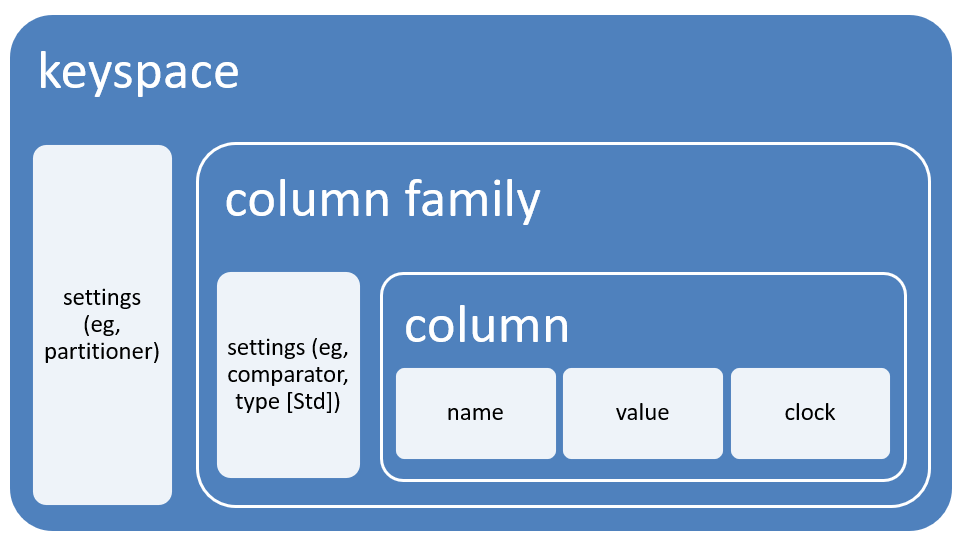

<div>
<img src="attachment:cassandra_structure.png" width="500"/>
</div>

Given below is the syntax for creating a keyspace using the statement `create keyspace`, which we will use later.


In [ ]:
# single cluster information
cassandra.execute("create keyspace book_store with replication={'class': 'SimpleStrategy', 'replication_factor': 1};")

In [ ]:
# select a node to perform the tasks
cassandra = cluster.connect("book_store")

###Elasticsearch

Also, according to the agenda, we need to run Elasticsearch for indexing. Therfore, we run and use a single cluster node of Elasticsearch.

In [ ]:
!sudo chown -R daemon:daemon ./elasticsearch/

In [ ]:
!sudo -H -u daemon elasticsearch/bin/elasticsearch

[2023-06-04T07:46:37,308][INFO ][o.e.n.Node               ] [332973d6ff14] version[8.8.0], pid[21598], build[tar/c01029875a091076ed42cdb3a41c10b1a9a5a20f/2023-05-23T17:16:07.179039820Z], OS[Linux/5.15.107+/amd64], JVM[Oracle Corporation/OpenJDK 64-Bit Server VM/20.0.1/20.0.1+9-29]
[2023-06-04T07:46:37,315][INFO ][o.e.n.Node               ] [332973d6ff14] JVM home [/content/elasticsearch/jdk], using bundled JDK [true]
[2023-06-04T07:46:37,316][INFO ][o.e.n.Node               ] [332973d6ff14] JVM arguments [-Des.networkaddress.cache.ttl=60, -Des.networkaddress.cache.negative.ttl=10, -Djava.security.manager=allow, -XX:+AlwaysPreTouch, -Xss1m, -Djava.awt.headless=true, -Dfile.encoding=UTF-8, -Djna.nosys=true, -XX:-OmitStackTraceInFastThrow, -Dio.netty.noUnsafe=true, -Dio.netty.noKeySetOptimization=true, -Dio.netty.recycler.maxCapacityPerThread=0, -Dlog4j.shutdownHookEnabled=false, -Dlog4j2.disable.jmx=true, -Dlog4j2.formatMsgNoLookups=true, -Djava.locale.providers=SPI,COMPAT, --add-opens=j

In [ ]:
!./elasticsearch/bin/elasticsearch -d

!echo "Waiting a while until Elasticsearch services are up and running..."
!sleep 30

[2023-06-04T07:42:06,468][ERROR][o.e.b.Elasticsearch      ] [332973d6ff14] fatal exception while booting Elasticsearch java.lang.RuntimeException: can not run elasticsearch as root
	at org.elasticsearch.server@8.8.0/org.elasticsearch.bootstrap.Elasticsearch.initializeNatives(Elasticsearch.java:262)
	at org.elasticsearch.server@8.8.0/org.elasticsearch.bootstrap.Elasticsearch.initPhase2(Elasticsearch.java:161)
	at org.elasticsearch.server@8.8.0/org.elasticsearch.bootstrap.Elasticsearch.main(Elasticsearch.java:66)

ERROR: Elasticsearch did not exit normally - check the logs at /content/elasticsearch/logs/elasticsearch.log
Waiting a while until Elasticsearch services are up and running...


In [ ]:
# if we get 1 root & 2 daemon process then Elasticsearch instance has started successfully
!ps -ef  | grep elasticsearch

root       21767     404  0 07:46 ?        00:00:00 /bin/bash -c ps -ef  | grep elasticsearch
root       21769   21767  0 07:46 ?        00:00:00 grep elasticsearch


In [ ]:
# check if elasticsearch is running
!curl -sX GET "localhost:9200/"

On the other hand, to create a dataset in Elasticsearch, we need to set up a data stream or an index. A data stream is a convenient way to ingest, search, and manage time series data. An index is a collection of documents that have similar characteristics. Depending on the type of use and data type, each of the dataset types can be used.

We should follow these steps to set up an index:

*  Define index settings and mappings
*  Create the index
*  Secure the index
*  Index documents

Here is an example of how to define index settings and mappings using the create index API:


```
PUT my-index
{
  "settings" : {
  "number_of_shards" : 1,
  "number_of_replicas" : 0,
  "index.lifecycle.name" : "my-lifecycle-policy"
  },
  "mappings" : {
    "_source" : {
    "enabled" : true
    },
    "@timestamp" : {
    "type" : "date",
    "format" :  "date_optional_time||epoch_millis"
    },
    "@version" : {
    "type" :  "keyword"
    },
  ...
  }
}```



And to set up a data stream, we need to follow these steps:

*  Create an index lifecycle policy
*  Create component templates
*  Create an index template
*  Create the data stream
*  Secure the data stream

Here is an example of how to create an index lifecycle policy using the create lifecycle policy API:



```
PUT _ilm/policy/my_policy
{
  "policy": {
    "_meta": {
      "description": "used for nginx log",
      "project": {
        "name": "myProject",
        "department": "myDepartment"
      }
    },
    "phases": {
      "warm": {
        "min_age": "10d",
        "actions": {
          "forcemerge": {
            "max_num_segments": 1
          }
        }
      },
      "delete": {
        "min_age": "30d",
        "actions": {
          "delete": {}
        }
      }
    }
  }
}
```
If the request succeeds, we receive the result that includes `"acknowledged": true`.


There are various ways for working with Elasticsearch such as Restful or Client. An Elasticsearch client is a software library or a tool that allows us to interact with an Elasticsearch cluster. An Elasticsearch client can perform various operations on data, such as indexing, searching, updating, deleting, aggregating, and more. It can also help us manage cluster, such as creating and deleting indices, configuring mappings and settings, monitoring health and performance, and more.

In [ ]:
# create the client instance
elasticsearch = Elasticsearch("http://localhost:9200")

# successful response!
elasticsearch.info()
# {'name': 'instance-0000000000', 'cluster_name': ...}
#elasticsearch.ping()

ObjectApiResponse({'name': 'instance-0000000001', 'cluster_name': '5b29ca3f04994997bbf10c8f73763d29', 'cluster_uuid': '4_zciBQ9QhGSSinNMf6ooQ', 'version': {'number': '8.8.0', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': 'c01029875a091076ed42cdb3a41c10b1a9a5a20f', 'build_date': '2023-05-23T17:16:07.179039820Z', 'build_snapshot': False, 'lucene_version': '9.6.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

Most of the data exchange structure with Elasticsearch is JSON based. Using the following code, we define an index zone in Elasticsearch, which will be useed to execute for some tasks later.

In [ ]:
index_name = "book_store"

#**Data Exploring**
Let us read in the file and take a look at the variables of the dataset.
Before doing any slice & dice of the dataset or anythingelse, we should first be aware what all columns it has and its data types by exploring the dataset.

##**Loading Dataset**

There are three ways to load and read data in Colab, using Google Drive, upload file or from external sources. In the following, we will look at both options.

In the following methods, we read our collection by `read.csv()` method that `header=true` means the first row is a header, `sep=','` means the column are seperated using `','`, and `inferschema=true` infers the input schema automatically while loading the data.

In [ ]:
# dataset name
dataset_name = "books-info.csv"

###Upload File
We can upload the dataset file in the Colab environment.

In [ ]:
from google.colab import files
files.upload()

###Google Drive
Also, it is necessary to mount Google Drive to Google Colab when we like to read data from it. This will enable us to access any directory on Google Drive inside the workspace on Colab notebook.

In [ ]:
# mount Google Drive to access the dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# file path on Google Drive
drive_file_path = f"/content/drive/My Drive/Academic Projects/Datasets/{dataset_name}"
# load data from csv to a dataframe.
df = spark.read.csv(drive_file_path, header = True, inferSchema = True, sep= ",")

###External Sources
Accessing external data from Google Driver or the workspace is not possible when using PySpark in Google Colab. Therefore, we first download the data set from the desired source such as GitHub and then read it.

In [ ]:
# file url on Github
url_file_path = f"https://raw.githubusercontent.com/ahkhaniki/spark-machine-learning/main/datasets/{dataset_name}"
!wget -O {dataset_name} {url_file_path}

--2023-06-05 20:30:22--  https://raw.githubusercontent.com/ahkhaniki/spark-machine-learning/main/datasets/books-info.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14149126 (13M) [text/plain]
Saving to: ‘books-info.csv’

books-info.csv      100%[===================>]  13.49M  --.-KB/s    in 0.1s    

2023-06-05 20:30:22 (92.8 MB/s) - ‘books-info.csv’ saved [14149126/14149126]



In [ ]:
# load data from csv to a dataframe.
df = spark.read.csv(dataset_name, sep = ",", header = True, inferSchema = True)

##**Descriptive Analysis**

After reading the data into PySpark as DataFrame (DF), we can show the first few observations using `show()` or `cache()` method.

Each of them displays data that loaded from our dataset into a DataFrame. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

How big is the dataset?

In [ ]:
# extract number of rows and columns from the Dataframe
print(f"Dimension of the dataset is:") # or {(df.count(), len(df.columns))}
print(f"--Rows: {df.count()}")
print(f"--Columns: {len(df.columns)}")

Dimension of the dataset is:
--Rows: 42198
--Columns: 16


We can see the names of the dataset columns below.

In [ ]:
# get all column names from dataframe
df.columns

['title',
 'url',
 'contributors',
 'date',
 'format',
 'fulltext_url',
 'trove_id',
 'language',
 'rights',
 'pages',
 'form',
 'volume',
 'parent',
 'children',
 'text_downloaded',
 'text_file']

We can review the dataset by looking at the first few rows of data. For accessing data multiple times, `cache()` are used .

In [ ]:
df.cache().show()

+--------------------+--------------------+--------------------+---------+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+
|               title|                 url|        contributors|     date|              format|        fulltext_url|          trove_id|language|              rights|pages|               form|volume|parent|children|text_downloaded|           text_file|
+--------------------+--------------------+--------------------+---------+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+
|Goliath Joe, fish...|https://trove.nla...|  Thackeray, Charles|1900-1919|Book|Book/Illustr...|https://nla.gov.a...|nla.obj-2831231419| English|Out of Copyright|...|  130|               Book|  null|  null|    null|           True|goliath-joe-fi

Before doing anything, it is better to check the dataset for missing values and null, if any, correct or remove them using different methods based on the type of them.



First, we need to get a general overview and description of the dataset. Commonly `df.dtypes` and `printSchema()` are the two methods used to view data types of a dataframe in pyspark. We can also retrieve the data type of a specific column name using `df.schema["name"].dataType` or get all column names by using `df.columns`.

In [ ]:
# get all column types from dataframe
df.dtypes

[('title', 'string'),
 ('url', 'string'),
 ('contributors', 'string'),
 ('date', 'string'),
 ('format', 'string'),
 ('fulltext_url', 'string'),
 ('trove_id', 'string'),
 ('language', 'string'),
 ('rights', 'string'),
 ('pages', 'string'),
 ('form', 'string'),
 ('volume', 'string'),
 ('parent', 'string'),
 ('children', 'string'),
 ('text_downloaded', 'string'),
 ('text_file', 'string')]

We can print out the schema in tree format via `printSchema()` method, which shows the datatypes as well.

In [ ]:
df.printSchema()

root
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- contributors: string (nullable = true)
 |-- date: string (nullable = true)
 |-- format: string (nullable = true)
 |-- fulltext_url: string (nullable = true)
 |-- trove_id: string (nullable = true)
 |-- language: string (nullable = true)
 |-- rights: string (nullable = true)
 |-- pages: string (nullable = true)
 |-- form: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- parent: string (nullable = true)
 |-- children: string (nullable = true)
 |-- text_downloaded: string (nullable = true)
 |-- text_file: string (nullable = true)



According above, the dataset has the following structure:
* title: title of the book
* url: link to the metadata record in Trove
* contributurs: pip-seprated names of contributors
* date: publication date
* format: The type of the work, eg ‘book’ or ‘government publication’, can have multiple
values (pip-seprated)
* full_text_url: link to the digital version;
* trove_id: unique identifire of the digital version
* language: mail language of the work
* rights: copyright status
* pages: number of pages
* form: work format, generally one of ‘Book’, ‘Multi volume book’, or ‘Digital publication’
* volume: volume/ part number
* children: pip-seprated ids of any child work
* parent: id of parent work (if any)
* text_downloaded: file name of the downloaded OCR text
* text_file: True/ False is there any OCRd text

In order to get a comprehensive view, we need to obtain a summary of the central tendency, dispersion and shape of the dataset’s distribution, by analyzing both numeric and object series, as well as DataFrame column sets of mixed data types.

The `describe()` method is used for calculating some statistical data like percentile, mean and std of the values. Although this summary may not be very useful which the dataset are be using, but it can keep us out of the dark.


In [ ]:
df.describe().show()

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+-----------------+------------------+------------------+--------------------+------------------+-----------------+--------------------+--------------------+--------------------+
|summary|               title|                 url|        contributors|                date|              format|        fulltext_url|          trove_id|         language|            rights|             pages|                form|            volume|           parent|            children|     text_downloaded|           text_file|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+-----------------+------------------+------------------+--------------------+------------------+-----------------+--------------------+--------------------+--------------------+
|  c

Next, if we have a few columns with null values, it’s best to replace them with some values. Therefore, we will use the `fillna()` method to replace the null values. Since Spark dataframes are immutable, we need to store the result in a new dataframe if there are.

Unlike the pandas library, in PySpark we don't have easy and quick access to the `isnull()` method for counting missing values.

Count of Missing values of dataframe in PySpark is obtained using `isnan()` method. Each column name is passed to `isnan()` method which returns the count of missing values of each columns. So number of missing values of each column in dataframe will be shown.

In [ ]:
# get count of nan or missing values in pyspark
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|title|url|contributors|date|format|fulltext_url|trove_id|language|rights|pages|form|volume|parent|children|text_downloaded|text_file|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|    0|  0|           0|   0|     0|           0|       0|       0|     0|    0|   0|     0|     0|       0|              0|        0|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+



Count of null values of dataframe in PySpark is obtained using `null()` method. Each column name is passed to `null()` method which returns the count of `null()` values of each columns. So number of null values of each column in dataframe will be shown.

In [ ]:
# get count of null values in pyspark
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|title|url|contributors|date|format|fulltext_url|trove_id|language|rights|pages|form|volume|parent|children|text_downloaded|text_file|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|    0|  7|        6433| 161|    54|          57|      39|   14216| 14369|   99|  91| 40426| 40575|   41842|            343|    12687|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+



Now, we can count both null and missing values of dataframe by using `null()` and `isnan()` methods as following in pyspark. So number of both null values and missing values of each column in dataframe will be displayed.



In [ ]:
# get count of both null and missing values in pyspark
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|title|url|contributors|date|format|fulltext_url|trove_id|language|rights|pages|form|volume|parent|children|text_downloaded|text_file|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|    0|  7|        6433| 161|    54|          57|      39|   14216| 14369|   99|  91| 40426| 40575|   41842|            343|    12687|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+



In [ ]:
# get count of both null and missing values in pyspark
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|title|url|contributors|date|format|fulltext_url|trove_id|language|rights|pages|form|volume|parent|children|text_downloaded|text_file|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|    0|  7|        6433| 161|    54|          57|      39|   14216| 14369|   99|  91| 40426| 40575|   41842|            343|    12687|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+



As seen, some fields have null or missing value according to above result.

In the following, we also read the dataset with Pandas.

In [ ]:
import pandas as pd

pd_df = pd.read_csv(dataset_name, sep = ",")
print(f"Dimension of the dataset is:", pd_df.shape)

pd_df.head(5)

Dimension of the dataset is: (42174, 16)


,title,url,contributors,date,format,fulltext_url,trove_id,language,rights,pages,form,volume,parent,children,text_downloaded,text_file
0,"Goliath Joe, fisherman / by Charles Thackeray ...",https://trove.nla.gov.au/work/10013347,"Thackeray, Charles",1900-1919,Book|Book/Illustrated,https://nla.gov.au/nla.obj-2831231419,nla.obj-2831231419,English,Out of Copyright|http://rightsstatements.org/v...,130,Book,NaN,NaN,NaN,True,goliath-joe-fisherman-by-charles-thackeray-wob...
1,Grammar of the Narrinyeri tribe of Australian ...,https://trove.nla.gov.au/work/10029401,"Taplin, George",1878-1880,Book|Government publication,http://nla.gov.au/nla.obj-688657424,nla.obj-688657424,English,Out of Copyright|http://rightsstatements.org/v...,24,Book,NaN,NaN,NaN,True,grammar-of-the-narrinyeri-tribe-of-australian-...
2,The works of the Rev. Sydney Smith,https://trove.nla.gov.au/work/1004403,"Smith, Sydney, 1771-1845",1839-1900,Book|Book/Illustrated|Microform,https://nla.gov.au/nla.obj-630176596,nla.obj-630176596,English,No known copyright restrictions|http://rightss...,65,Book,NaN,NaN,NaN,True,the-works-of-the-rev-sydney-smith-nla.obj-6301...
3,Nellie Doran : a story of Australian home and ...,https://trove.nla.gov.au/work/10049667,Miriam Agatha,1914-1923,Book,http://nla.gov.au/nla.obj-24357566,nla.obj-24357566,English,Out of Copyright|http://rightsstatements.org/v...,246,Book,NaN,NaN,NaN,True,nellie-doran-a-story-of-australian-home-and-sc...
4,Lastkraftwagen 3 t Ford : Baumuster V 3000 S :...,https://trove.nla.gov.au/work/10053234,Germany. Heer. Heereswaffenamt,1942,Book|Book/Illustrated|Government publication,https://nla.gov.au/nla.obj-51530748,nla.obj-51530748,German,Out of Copyright|http://rightsstatements.org/v...,80,Book,NaN,NaN,NaN,True,lastkraftwagen-3-t-ford-baumuster-v-3000-s-ger...


In [ ]:
pd_df.isnull().sum()

title                  0
url                    0
contributors        6555
date                  88
format                 0
fulltext_url           0
trove_id               0
language           14284
rights             14409
pages                  0
form                  16
volume             40751
parent             40751
children           41934
text_downloaded        0
text_file          12522
dtype: int64

Oops! comparing the results of reading data with the library, we noticed differences in the results. For example, in PySpark, `pages` field has 99 cases of null value, while no null value was observed in Pandas. It seems we encountered a bug.



Note, we are goping to do Exploratory Data Analysis (EDA) in Kibana section.

#**Data Processing**

In this section, we try to learn and experience some data engineering processes. Since null and missing values were observed in the dataset, the first step is to perform data preprocessing.

##**Preprocessing**

As seen, we had a bug in reading the information. We overcome this problem by transferring data from Pandas to PySpark.

In [ ]:
# handle pandas null (NaN) values
pd_df = pd_df.replace(np.nan, None)
# create spark dataframe based on pandas dataframe
raw_df = spark.createDataFrame(pd_df)
raw_df.show()

+--------------------+--------------------+--------------------+---------+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+
|               title|                 url|        contributors|     date|              format|        fulltext_url|          trove_id|language|              rights|pages|               form|volume|parent|children|text_downloaded|           text_file|
+--------------------+--------------------+--------------------+---------+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+
|Goliath Joe, fish...|https://trove.nla...|  Thackeray, Charles|1900-1919|Book|Book/Illustr...|https://nla.gov.a...|nla.obj-2831231419| English|Out of Copyright|...|  130|               Book|  null|  null|    null|           true|goliath-joe-fi

In [ ]:
# review and compare schema
raw_df.printSchema()

root
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- contributors: string (nullable = true)
 |-- date: string (nullable = true)
 |-- format: string (nullable = true)
 |-- fulltext_url: string (nullable = true)
 |-- trove_id: string (nullable = true)
 |-- language: string (nullable = true)
 |-- rights: string (nullable = true)
 |-- pages: long (nullable = true)
 |-- form: string (nullable = true)
 |-- volume: double (nullable = true)
 |-- parent: string (nullable = true)
 |-- children: string (nullable = true)
 |-- text_downloaded: boolean (nullable = true)
 |-- text_file: string (nullable = true)



In [ ]:
raw_df.describe().show()

+-------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+-----------------+--------------------+------------+------------------+-------+------------------+------------------+--------------------+--------------------+
|summary|               title|                 url|        contributors|             date|              format|        fulltext_url|         trove_id|            language|      rights|             pages|   form|            volume|            parent|            children|           text_file|
+-------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+-----------------+--------------------+------------+------------------+-------+------------------+------------------+--------------------+--------------------+
|  count|               42174|               42174|               35619|            42086|               42174|             

As seen, we have error on `text_downloaded` data type. Therefore we do things to by pass it.

In [ ]:
# cast numeric variable from string type to int/long type
# by replacing or converting null values to 0 with when condition
#processed_df = processed_df.withColumn("pages", when(col("pages").isNull(), "0").otherwise(col("pages")))

In [ ]:
raw_df = raw_df.withColumn("text_downloaded", col("text_downloaded").cast(IntegerType()))
raw_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in raw_df.columns]).show()
raw_df = raw_df.withColumn("text_downloaded", col("text_downloaded").cast(BooleanType()))

+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|title|url|contributors|date|format|fulltext_url|trove_id|language|rights|pages|form|volume|parent|children|text_downloaded|text_file|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+
|    0|  0|        6555|  88|     0|           0|       0|   14284| 14409|    0|  16| 40751| 40751|   41934|              0|    12522|
+-----+---+------------+----+------+------------+--------+--------+------+-----+----+------+------+--------+---------------+---------+



In [ ]:
parent_books_items = raw_df.where((col("parent").isNotNull()))\
                  .select("parent","trove_id", "title", "contributors", "fulltext_url","format", "pages", "date")

print(f"Parent books include {parent_books_items.count()} items.")
parent_books_items.agg(sum("pages"), avg("pages")).show()
parent_books_items.show()

Parent books include 1423 items.
+----------+-----------------+
|sum(pages)|       avg(pages)|
+----------+-----------------+
|    424698|298.4525650035137|
+----------+-----------------+

+------------------+------------------+--------------------+--------------------+--------------------+--------------------+-----+---------+
|            parent|          trove_id|               title|        contributors|        fulltext_url|              format|pages|     date|
+------------------+------------------+--------------------+--------------------+--------------------+--------------------+-----+---------+
|  nla.obj-60272760|  nla.obj-60272771|A Malay-English d...|Wilkinson, R. J. ...|http://nla.gov.au...|                Book|  644|1932-1969|
|  nla.obj-60272760|  nla.obj-60272783|A Malay-English d...|Wilkinson, R. J. ...|http://nla.gov.au...|                Book|  674|1932-1969|
|nla.obj-2428558076|nla.obj-2438504941|The Plus in your ...|                 MLC|http://nla.gov.au...|         

In [ ]:
children_books_items = raw_df.where((col("children").isNotNull()))\
                  .select("children","trove_id", "title", "contributors", "fulltext_url","format", "pages", "date")

print(f"Children books include {children_books_items.count()} items.")
children_books_items.agg(sum("pages"), avg("pages")).show()
children_books_items.show()

Children books include 240 items.
+----------+----------+
|sum(pages)|avg(pages)|
+----------+----------+
|         0|       0.0|
+----------+----------+

+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+-----+---------+
|            children|          trove_id|               title|        contributors|        fulltext_url|              format|pages|     date|
+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+-----+---------+
|nla.obj-60272771|...|  nla.obj-60272760|A Malay-English d...|Wilkinson, R. J. ...|http://nla.gov.au...|                Book|    0|1932-1969|
|nla.obj-243850494...|nla.obj-2428558076|The Plus in your ...|                 MLC|https://nla.gov.a...|                Book|    0|     1949|
|    nla.obj-77324219|  nla.obj-77324653|Henderson's Austr...|Henderson, Alexander|http://nla.gov.au...|Book|Book/Illustr...|    0|1941

In [ ]:
raw_df.where(col("date").contains("-")).count()

5061

In [ ]:
book_simple_year_df = raw_df.where(~col("date").contains("-"))
book_range_year_df = raw_df.where(col("date").contains("-"))

In [ ]:
print(f"There are {book_simple_year_df.count()} books with simple year.")
book_simple_year_df.show()

There are 37025 books with simple year.
+--------------------+--------------------+--------------------+----+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+
|               title|                 url|        contributors|date|              format|        fulltext_url|          trove_id|language|              rights|pages|               form|volume|parent|children|text_downloaded|           text_file|
+--------------------+--------------------+--------------------+----+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+
|Lastkraftwagen 3 ...|https://trove.nla...|Germany. Heer. He...|1942|Book|Book/Illustr...|https://nla.gov.a...|  nla.obj-51530748|  German|Out of Copyright|...|   80|               Book|  null|  null|    null|          

In [ ]:
print(f"There are {book_range_year_df.count()} books with range year.")
book_range_year_df.show()

There are 5061 books with range year.
+--------------------+--------------------+--------------------+---------+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+
|               title|                 url|        contributors|     date|              format|        fulltext_url|          trove_id|language|              rights|pages|               form|volume|parent|children|text_downloaded|           text_file|
+--------------------+--------------------+--------------------+---------+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+
|Goliath Joe, fish...|https://trove.nla...|  Thackeray, Charles|1900-1919|Book|Book/Illustr...|https://nla.gov.a...|nla.obj-2831231419| English|Out of Copyright|...|  130|               Book|  null|  null| 

In [ ]:
book_simple_year_df = book_simple_year_df.withColumn("year", col("date").cast(IntegerType()))
book_simple_year_df.printSchema()

root
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- contributors: string (nullable = true)
 |-- date: string (nullable = true)
 |-- format: string (nullable = true)
 |-- fulltext_url: string (nullable = true)
 |-- trove_id: string (nullable = true)
 |-- language: string (nullable = true)
 |-- rights: string (nullable = true)
 |-- pages: long (nullable = true)
 |-- form: string (nullable = true)
 |-- volume: double (nullable = true)
 |-- parent: string (nullable = true)
 |-- children: string (nullable = true)
 |-- text_downloaded: boolean (nullable = true)
 |-- text_file: string (nullable = true)
 |-- year: integer (nullable = true)



In [ ]:
print(f"There are {book_simple_year_df.count()} books, after 'simple date' processing.")
book_simple_year_df.select("title", "trove_id", "date", "year").show()

There are 37025 books, after 'simple date' processing.
+--------------------+------------------+----+----+
|               title|          trove_id|date|year|
+--------------------+------------------+----+----+
|Lastkraftwagen 3 ...|  nla.obj-51530748|1942|1942|
|Military report o...| nla.obj-233089297|1909|1909|
|Le Siege de Berli...| nla.obj-509324870|1915|1915|
|The Aborigines of...| nla.obj-188910904|1888|1888|
|Astronomia : Teut...| nla.obj-230899009|1545|1545|
|Glenorchy social ...|nla.obj-1382470285|2003|2003|
|Heaven and earth ...| nla.obj-134928341|1979|1979|
|The people's trea...|   nla.obj-4952636|1993|1993|
|Catalogue of hors...| nla.obj-470088899|1896|1896|
|General power of ...|  nla.obj-76416324|1827|1827|
|Pictures of Austr...|  nla.obj-52822048|1911|1911|
|Notes on the abor...| nla.obj-756755978|1907|1907|
|Report of the Roy...| nla.obj-713670609|1925|1925|
|Report of chairma...|nla.obj-2772295258|1962|1962|
|Report of Royal C...| nla.obj-891191685|1964|1964|
|Report o

In [ ]:
# split the "date" by dash into separate start and end year
#book_range_year_df = book_range_year_df.withColumn("year_range", split("date", "-"))
book_range_year_df = book_range_year_df.withColumn("start_year", split(col("date"), "-").getItem(0).cast(IntegerType()))
book_range_year_df = book_range_year_df.withColumn("end_year", split(col("date"), "-").getItem(1).cast(IntegerType()))
# generate a range of years using sequence and explode the result
book_range_year_df = book_range_year_df.withColumn("year", explode(sequence(col("start_year"), col("end_year"))))
# drop temporary columns
book_range_year_df = book_range_year_df.drop("start_year", "end_year")

book_range_year_df.printSchema()

root
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- contributors: string (nullable = true)
 |-- date: string (nullable = true)
 |-- format: string (nullable = true)
 |-- fulltext_url: string (nullable = true)
 |-- trove_id: string (nullable = true)
 |-- language: string (nullable = true)
 |-- rights: string (nullable = true)
 |-- pages: long (nullable = true)
 |-- form: string (nullable = true)
 |-- volume: double (nullable = true)
 |-- parent: string (nullable = true)
 |-- children: string (nullable = true)
 |-- text_downloaded: boolean (nullable = true)
 |-- text_file: string (nullable = true)
 |-- year: integer (nullable = false)



In [ ]:
print(f"There are {book_range_year_df.count()} books, after 'range date' processing.")
book_range_year_df.select("title", "trove_id", "date", "year").show()

There are 212995 books, after 'range date' processing.
+--------------------+------------------+---------+----+
|               title|          trove_id|     date|year|
+--------------------+------------------+---------+----+
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1900|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1901|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1902|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1903|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1904|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1905|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1906|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1907|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1908|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1909|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1910|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1911|
|Goliath Joe, fish...|nla.obj-2831231419|1900-1919|1912|
|Goliath Joe, fish...|nla.obj-283

In [ ]:
processed_df = book_simple_year_df.union(book_range_year_df)
print(f"The number of books after 'date' processing is {processed_df.count()}.")
processed_df.show()

The number of books after 'date' processing is 250020.
+--------------------+--------------------+--------------------+----+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+----+
|               title|                 url|        contributors|date|              format|        fulltext_url|          trove_id|language|              rights|pages|               form|volume|parent|children|text_downloaded|           text_file|year|
+--------------------+--------------------+--------------------+----+--------------------+--------------------+------------------+--------+--------------------+-----+-------------------+------+------+--------+---------------+--------------------+----+
|Lastkraftwagen 3 ...|https://trove.nla...|Germany. Heer. He...|1942|Book|Book/Illustr...|https://nla.gov.a...|  nla.obj-51530748|  German|Out of Copyright|...|   80|               Book|  n

##**Exploratory Data Analysis**
Before building any model, it is essential to understand the dataset. Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.

In other words, EDA is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.

**Book Form**

+-------------------+------+
|               form| count|
+-------------------+------+
|            Picture|  5482|
|    Other - General|    98|
|               null|    17|
|Digital Publication| 21638|
|               Book|172470|
|         Manuscript|   305|
| Other - Australian|     1|
|  Multi Volume Book| 46024|
|            Journal|  3799|
|                Map|   186|
+-------------------+------+



[Text(0.5, 1.0, 'Books by form')]

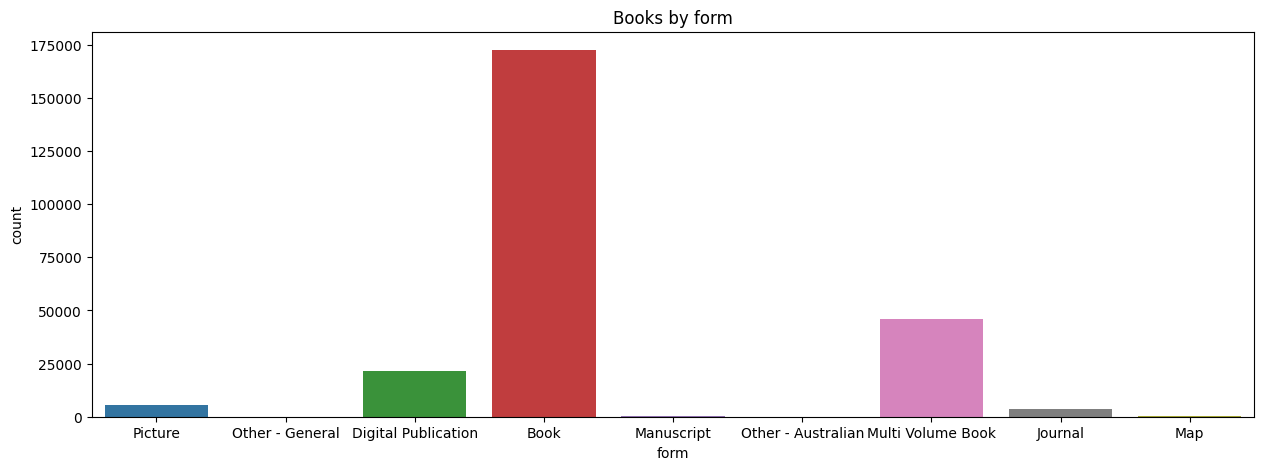

In [ ]:
books_by_form = processed_df.groupBy("form").count()
books_by_form.show()
plt.figure(figsize=(15,5))
sns.barplot(x = "form", y = "count", data = books_by_form.toPandas()).set(title="Books by form")

**Book Downloadable**

+------------+------+
|downloadable| count|
+------------+------+
|        true|193135|
|       false| 56885|
+------------+------+



[Text(0.5, 1.0, 'Books by form')]

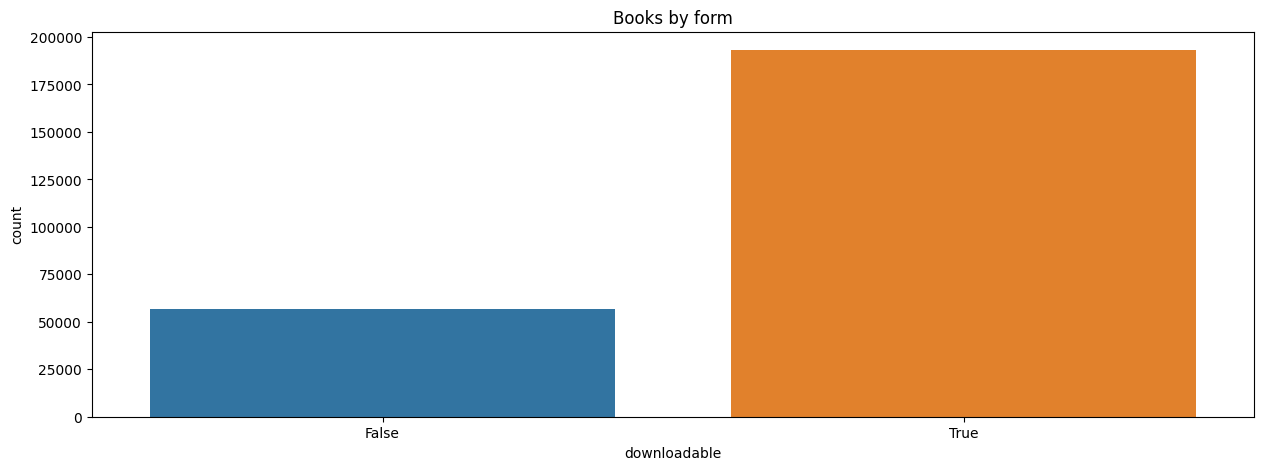

In [ ]:
books_by_download = processed_df.groupBy(col("text_downloaded").alias("downloadable")).count()
books_by_download.show()
plt.figure(figsize=(15,5))
sns.barplot(x = "downloadable", y = "count", data = books_by_download.toPandas()).set(title="Books by form")

+----+-----+
|year|count|
+----+-----+
|1829|  437|
|1959| 1258|
|1580|   35|
|1896| 1200|
|1990|  968|
|1903| 1317|
|1650|   47|
|1884| 1143|
|1975| 1132|
|1977| 1172|
|1888| 1291|
|1787|  148|
|1766|  114|
|1718|   82|
|1808|  368|
|1863|  832|
|1700|   71|
|1924| 1422|
|2003|  773|
|1823|  410|
+----+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Books by year')]

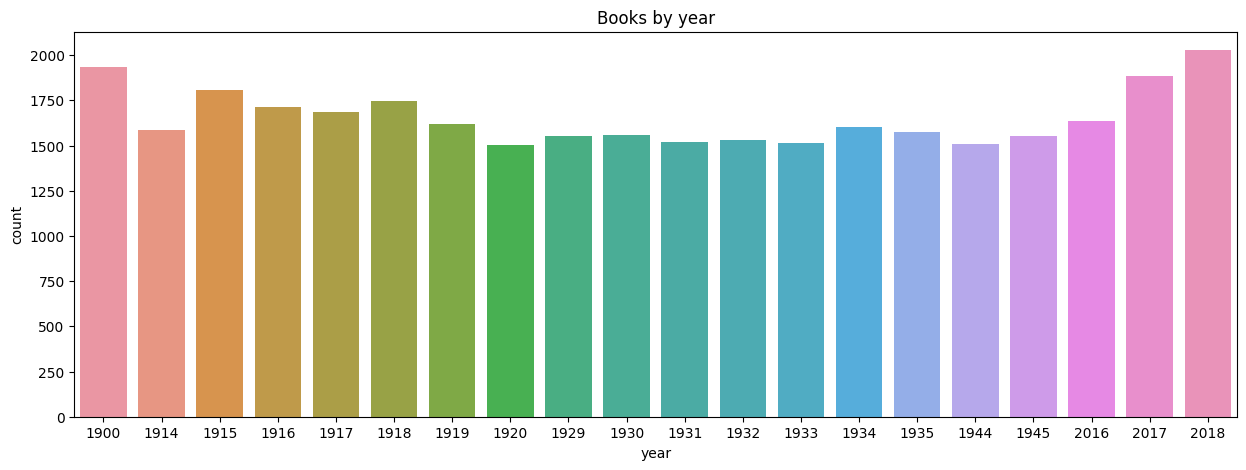

In [ ]:
books_by_download = processed_df.groupBy("year").count()
books_by_download.show()
plt.figure(figsize=(15,5))
sns.barplot(x = "year", y = "count", data = books_by_download.sort(desc("count")).toPandas().head(20)).set(title="Books by year")

##**Import data in Elasticsearch**

In this part, we will import the dataset into Elasticsearch using the index-zone that we have created.

Meantime, Elasticsearch automatically constructs the index and mapping when we index a document if they don’t already exist. The data mapping specifies the index’s structure, down to the data types used in the fields of the documents, which determines how fields are indexed and stored. While Elasticsearch auto-detects the schema based on the kind of JSON value through a process known as dynamic mapping, it is also possible to set this mapping statically.


Here's an example. This code will create a new index called `book_store` using the cluster we set up earlier.


```
mappings = {
        "properties": {
            "trove_id": {"type": "text", "analyzer": "standard"},
            "title": {"type": "text", "analyzer": "english"},
            "url": {"type": "text", "analyzer": "english"},
            "contributors": {"type": "text", "analyzer": "standard"},
            "date": {"type": "text", "analyzer": "standard"},
            "format": {"type": "text", "analyzer": "standard"},
            "fulltext_url": {"type": "text", "analyzer": "standard"},
            "year": {"type": "integer"},
    }
}

elasticsearch.indices.create(index="book_store", mappings=mappings)
```



In [ ]:
index_name

'book_store'

In [ ]:
import json

#save csv file in elasticsearch of books index
ds_json = processed_df.toPandas().to_json(orient="records")
#json_str = book_data.to_json(orient='records')

json_items = json.loads(ds_json)

dump_list = []

for item in json_items:
    record ={
        "_op_type": "index",
        "_index": index_name,
        "_source": item
    }
    dump_list.append(record)

helpers.bulk(elasticsearch, dump_list)

(250020, [])

In [ ]:
# get info about elasticsearch index
elasticsearch.indices.refresh(index = index_name)
print(elasticsearch.cat.count(index = index_name, format="json"))

[{'epoch': '1685975116', 'timestamp': '14:25:16', 'count': '250020'}]


In [ ]:
# hit the contents of elasticsearch index
response = elasticsearch.search(index = index_name, query={"match_all": {}})
print("Got %d Hits:" % response['hits']['total']['value'])

for hit in response['hits']['hits']:
  print("%(title)s %(pages)s: %(format)s" % hit["_source"])

Got 10000 Hits:
Who are the real "clique"? : pass resolutions of protest! ; elect Easter delegates who will keep the movement straight!! 1: Book/Illustrated|Book
An act to reduce the capital and borrowing powers of 'The Melbourne Exchange Company' and for other purposes, 24th February, 1859 2: Book|Government publication
Coastal seagrass habitats at risk from human activity in the Great Barrier Reef World Heritage Area : Review of areas to be targeted for monitoring / Michael Rasheed [and 3 others] 0: Book/Illustrated|Book
Spatial distributions and temporal change in distributions of deep water seagrasses in the Great Barrier Reef region / Glenn De'ath [and 3 others] 0: Book/Illustrated|Book
2009 Great Barrier Reef survey season report / Reef Check Australia 0: Book/Illustrated|Book
Climate change projections : for the tropical rainforest region of North Queensland : Final report of MTSRF activities, 2006-2010 / R. Suppiah [and 4 others] 0: Book/Illustrated|Book
Coral bleaching and glo

In [ ]:
# query to find the number of children books
query = {
  "query": {
    "exists": {
      "field": "children"
    }
  }
}

response = elasticsearch.search(index = index_name, body = query)

# retrieve the count from the response
count = response['hits']['total']['value']
print(f"{count} children books found.")

5171 children books found.


In [ ]:
count = processed_df.where((col("children").isNotNull())).count()
print(f"{count} children books are in the dataset.")

5171 children books are in the dataset.


In [ ]:
# query to find the number of parent books
query = {
  "query": {
    "exists": {
      "field": "parent"
    }
  }
}

response = elasticsearch.search(index = index_name, body = query)

# retrieve the count from the response
count = response['hits']['total']['value']
print(f"{count} parent books found.")

10000 parent books found.


In [ ]:
# query to find the number of parent books
query = {
  "query": {
    "filtered": {
        "filter": {
        "missing": {
        "field": "parent"
        }
      }
    }
  }
}

response = elasticsearch.search(index = index_name, body = query)

# retrieve the count from the response
count = response['hits']['total']['value']
print(f"{count} parent books found.")

In [ ]:
count = processed_df.where((col("parent").isNotNull())).count()
print(f"{count} children books are in the dataset.")

28159 children books are in the dataset.


In [ ]:
# query to find the average book pages of children books
query = {
  "query": {
    "bool": {
      "must_not": {
        "exists": {
          "field": "children"
        }
      }
    }
  },
  "aggs": {
    "average_pages": {
      "avg": {
        "field": "pages"
      }
    }
  }
}

response = elasticsearch.search(index = index_name, body = query)

# retrieve the counts from the response
average_pages = response['aggregations']['average_pages']['value']
print(f"The average pages of children books is {average_pages}.")

The average pages of children books is 91.2473932913755.


In [ ]:
processed_df.where((col("children").isNotNull())).agg(avg("pages").alias("children_pages_avg")).show()

+----------+
|avg(pages)|
+----------+
|       0.0|
+----------+



In [ ]:
# query to find the average book pages of parent books
query = {
  "query": {
    "bool": {
      "must_not": {
        "exists": {
          "field": "parent"
        }
      }
    }
  },
  "aggs": {
    "average_pages": {
      "avg": {
        "field": "pages"
      }
    }
  }
}

response = elasticsearch.search(index = index_name, body = query)

# retrieve the counts from the response
average_pages = response['aggregations']['average_pages']['value']
print(f"The average pages of parent books is {average_pages}.")

The average pages of parent books is 81.98877224929122.


In [ ]:
processed_df.where((col("parent").isNotNull())).agg(avg("pages")).show()

+------------------+
|        avg(pages)|
+------------------+
|147.43854540289072|
+------------------+



In [ ]:
# query to calculate the number of books per year
query = {
  "size": 0,
  "aggs": {
    "group_by_year": {
      "terms": {
        "field": "year",
        "size": 10,
        "order": {
          "count": "desc"
        }
      },
      "aggs": {
        "count": {
          "value_count": {
            "field": "year"
          }
        }
      }
    }
  }
}

response = elasticsearch.search(index = index_name, body = query)

# retrieve the counts from the response
buckets = response['aggregations']['group_by_year']['buckets']
for bucket in buckets:
    year = bucket['key']
    count = bucket['doc_count']
    print(f"Year: {year}, Count: {count}")

Year: 2018, Count: 2028
Year: 1900, Count: 1937
Year: 2017, Count: 1884
Year: 1915, Count: 1806
Year: 1918, Count: 1748
Year: 1916, Count: 1711
Year: 1917, Count: 1685
Year: 2016, Count: 1636
Year: 1919, Count: 1619
Year: 1934, Count: 1604


In [ ]:
# books by year
processed_df.groupBy(col("year")).count().sort(desc("count")).show()

+----+-----+
|year|count|
+----+-----+
|2018| 2028|
|1900| 1937|
|2017| 1884|
|1915| 1806|
|1918| 1748|
|1916| 1711|
|1917| 1685|
|2016| 1636|
|1919| 1619|
|1934| 1604|
|1914| 1585|
|1935| 1576|
|1930| 1559|
|1945| 1555|
|1929| 1553|
|1932| 1533|
|1931| 1518|
|1933| 1514|
|1944| 1511|
|1920| 1502|
+----+-----+
only showing top 20 rows



In [ ]:
# query to calculate the number of books per date
query = {
  "size": 0,
  "aggs": {
    "group_by_year": {
      "terms": {
        "field": "date.keyword",
        "size": 10,
        "order": {
          "count": "desc"
        }
      },
      "aggs": {
        "count": {
          "value_count": {
            "field": "date.keyword"
          }
        }
      }
    }
  }
}

response = elasticsearch.search(index = index_name, body = query)

# retrieve the counts from the response
buckets = response['aggregations']['group_by_year']['buckets']
for bucket in buckets:
    year = bucket['key']
    count = bucket['doc_count']
    print(f"Year: {year}, Count: {count}")


Year: 1800-1899, Count: 14200
Year: 1971-9999, Count: 8029
Year: 1800-2015, Count: 7560
Year: 1900-1999, Count: 7200
Year: 1754-2016, Count: 5523
Year: 1500-1800, Count: 5418
Year: 1900-1988, Count: 2314
Year: 1716-2015, Count: 2100
Year: 2018, Count: 1594
Year: 1900-1990, Count: 1547


##**Visualization in Kibana**


Kibana is a free and open source frontend application that sits on top of the Elastic Stack, providing search and data visualization capabilities for data indexed in Elasticsearch.
Kibana also acts as the user interface for monitoring, managing, and securing an Elastic Stack cluster, as well as the centralized hub for built-in solutions developed on the Elastic Stack for observability, security, and enterprise search applications.

We can emplooye Kibana to explore, analyze, and visualize data in various ways, such as charts, maps, tables, and more. We can also create dashboards that combine multiple visualizations and filters to display the full picture of data and share them with others.

Dashboards in Kibana are collections of searches and visualizations that show data from Elasticsearch in different ways. We can use them to explore data, discover insights, and act on our findings.

To make a dashboard in Kibana, we need to index data into Elasticsearch and create a data view that specifies the fields and time range of data. We can then add various types of panels to our dashboard, such as maps, charts, tables, and more. We can also adjust the layout and look of our dashboard, and save it for future use or sharing.

We can go to the dashboard page from the main menu in Kibana, where we can start a new dashboard or open an existing one. We can also use the dashboard toolbar to add more panels, filters, drilldowns, and other options to improve our dashboard.

In the following, we show some examples of dashboards made in Kibana.

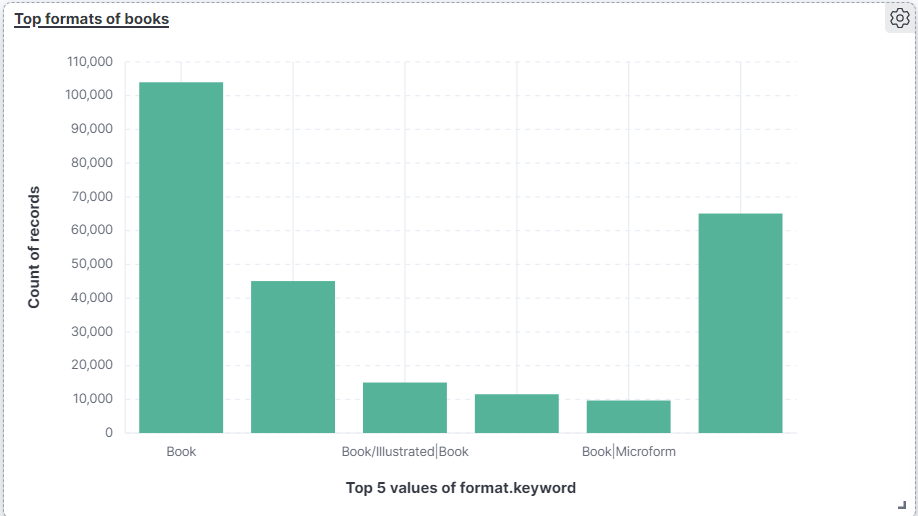

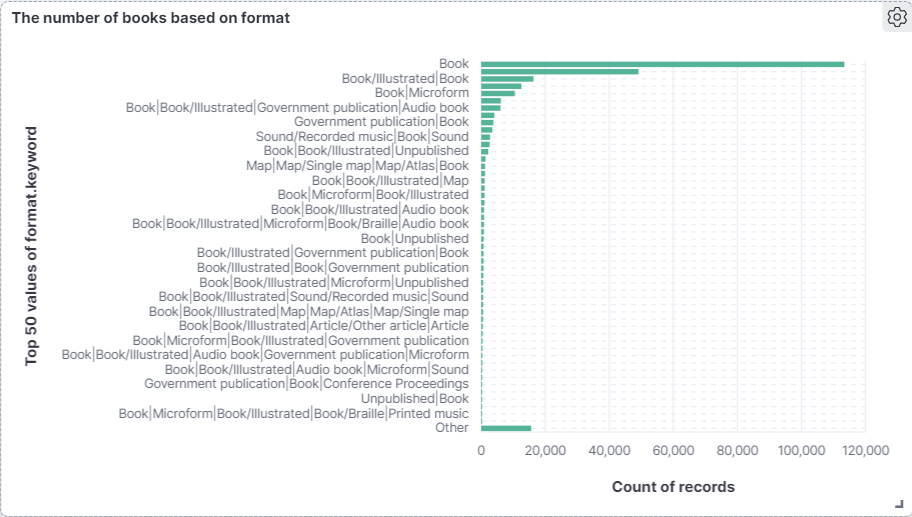

+--------------------+-----+
|              format|count|
+--------------------+-----+
|Article/Other art...|    1|
|Article/Journal o...|  160|
|Government public...|    1|
|Government public...|    2|
|Article/Report|Go...|    1|
|Book/Illustrated|...|14955|
|Article/Report|Ar...|    1|
|Government public...|    1|
|    Book|Unpublished|  729|
|Book|Government p...| 1246|
|Book|Government p...| 3179|
|Book|Book/Illustr...| 5614|
|Book/Illustrated|...|    2|
|      Published|Book|  416|
|Book|Government p...|    9|
|Article/Conferenc...|    9|
|Article/Other art...|   11|
|Book|Government p...|    3|
|Government public...|    1|
|Government public...|  971|
+--------------------+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Books by format')]

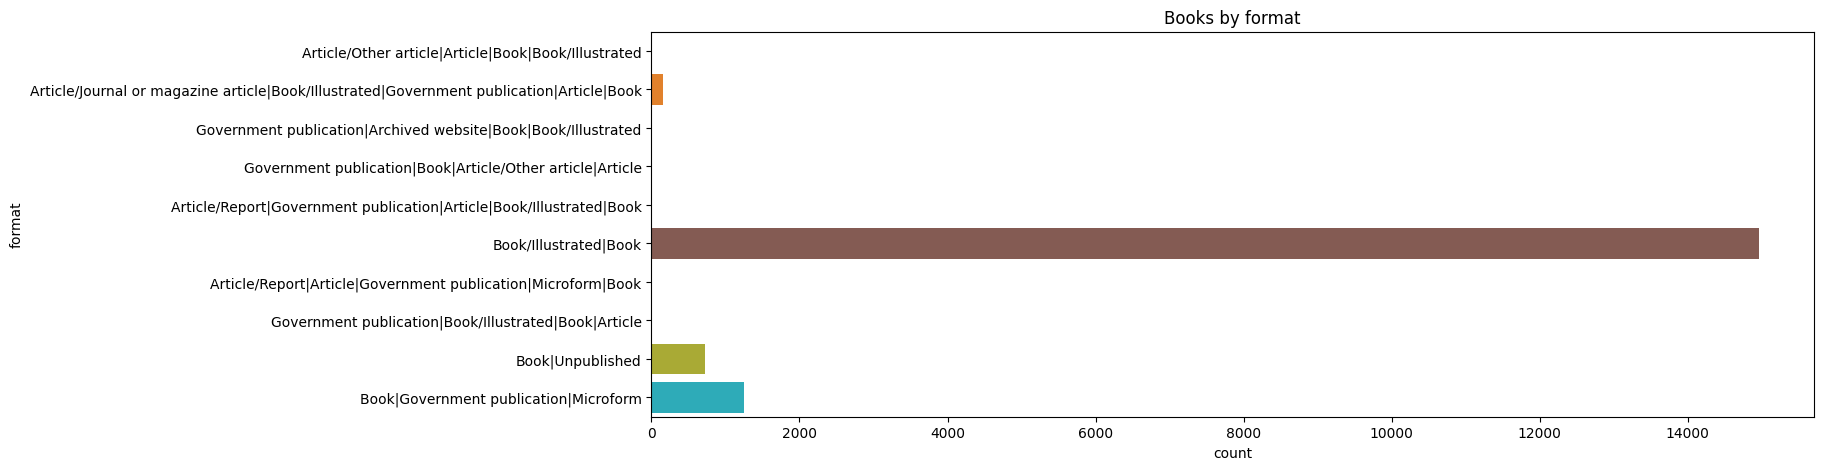

In [ ]:
books_by_format = processed_df.groupBy("format").count()
books_by_format.show()
plt.figure(figsize=(15,5))
sns.barplot(x = "count", y = "format", data = books_by_format.toPandas().head(10)).set(title="Books by format")

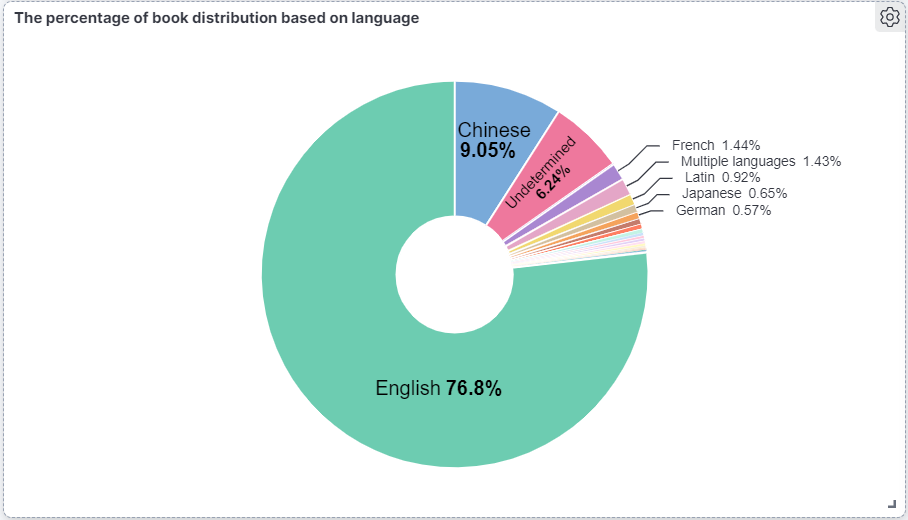

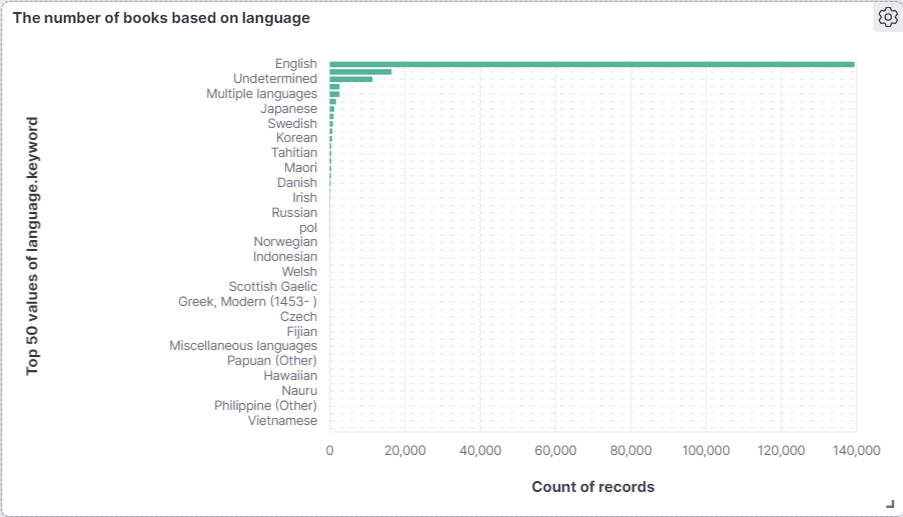

+--------------------+------+
|            language| count|
+--------------------+------+
|              Fijian|     2|
|                  Gã|     1|
|          Papiamento|     2|
|               Latin|  1553|
|Australian languages|   388|
|            Javanese|     1|
|             Finnish|     9|
|               Malay|     2|
|                Thai|     4|
|             Chinese| 15253|
|          Indonesian|    13|
|                null| 81439|
|               Maori|   369|
|              Polish|     6|
|            Hawaiian|     1|
|            Japanese|  1102|
|             English|129474|
|      Papuan (Other)|     2|
|             Spanish|   317|
|          Vietnamese|     1|
+--------------------+------+
only showing top 20 rows



[Text(0.5, 1.0, 'Books by language')]

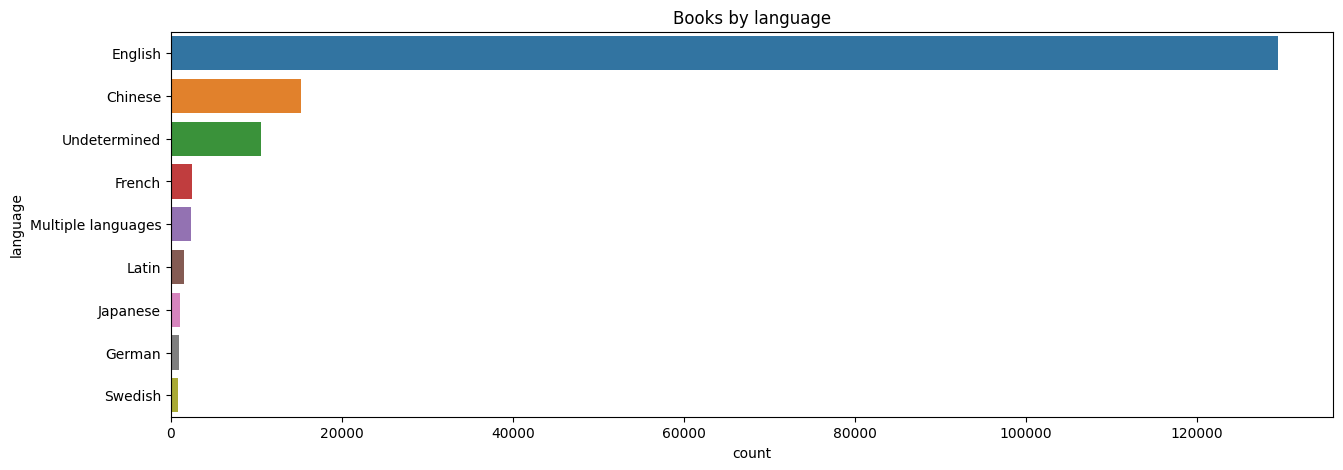

In [ ]:
books_by_language = processed_df.groupBy("language").count()
books_by_language.show()
plt.figure(figsize=(15,5))
sns.barplot(x = "count", y = "language", data = books_by_language.sort(desc("count")).toPandas().head(10)).set(title="Books by language")

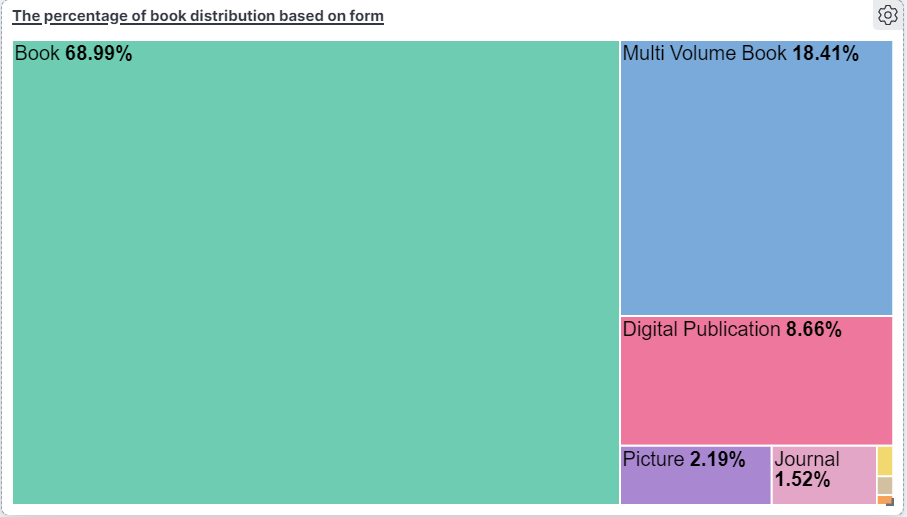

##**Transferring data from Elasticsearch to Cassandra**

Dumping data from elastic to spark is a process of transferring data from Elasticsearch to Spark. To dump data from Elastic to Spark, one can use different methods and tools, such as the elasticsearch-hadoop connector, the pandasticsearch library, elastic-client, or the spark-elasticsearch library. These methods and tools allow users to read data from Elasticsearch into Spark dataframes or RDDs. By dumping data from Elastic to spark, we can leverage the power and scalability of both platforms and gain insights from their data.

Here we employe elastic-client for dumping which was used in previous sections to write and perfome queries.

When dealing with a large number of records in Elasticsearch, it is recommended to use the Scroll API for efficient retrieval of all data. By default, maximum returned data is limited to 10,000 documents.

Since the number of our data is more than 10,000, we have to use Scroll to fetch all documents from an Elasticsearch. The Scroll API will return to you the results 10,000 by 10,000 as maximum.

In [ ]:
# number of documents to retrieve per scroll
scroll_size = 10000

# query to get all documents with scrolling
query = {
    "query": {
        "match_all": {}
    },
    "size": scroll_size
}

# do search to get the scroll id
results = elasticsearch.search(index = index_name, body = query, scroll = "1m")
scroll_id = results["_scroll_id"]

# retrieve and process all documents using scrolling
documents = []
while True:
    # retrieve the next batch of documents using the scroll id
    # scroll duration is set to 1m (1 minute)
    results = elasticsearch.scroll(scroll_id = scroll_id, scroll = "1m")

    # break the loop if no more documents are available
    if len(results["hits"]["hits"]) == 0:
        break

    # process the retrieved documents
    for doc in results["hits"]["hits"]:
        documents.append(doc["_source"])

    # update the scroll id for the next batch
    scroll_id = results["_scroll_id"]

# total number of documents retrieved
total_documents = len(documents)
print(f"{total_documents} documents are retrieved.")

250020 documents are retrieved.


In [ ]:
total_documents[1]

{'title': 'Report of 1934 session / State Parliamentary Labor Party',
 'url': 'https://trove.nla.gov.au/work/18044240',
 'contributors': 'Australian Labor Party. Victorian Branch',
 'date': '1934',
 'format': 'Book',
 'fulltext_url': 'https://nla.gov.au/nla.obj-2618779063',
 'trove_id': 'nla.obj-2618779063',
 'language': 'English',
 'rights': 'Out of Copyright|http://rightsstatements.org/vocab/NKC/1.0/',
 'pages': 4,
 'form': 'Book',
 'volume': None,
 'parent': None,
 'children': None,
 'text_downloaded': True,
 'text_file': 'report-of-1934-session-state-parliamentary-labor-nla.obj-2618779063.txt',
 'year': 1934}

In [ ]:
# create a DataFrame from the list of dictionaries
elasticsearch_dump_df = spark.createDataFrame(documents, processed_df.schema)

# display the schema and data of the DataFrame
elasticsearch_dump_df.printSchema()

root
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- contributors: string (nullable = true)
 |-- date: string (nullable = true)
 |-- format: string (nullable = true)
 |-- fulltext_url: string (nullable = true)
 |-- trove_id: string (nullable = true)
 |-- language: string (nullable = true)
 |-- rights: string (nullable = true)
 |-- pages: long (nullable = true)
 |-- form: string (nullable = true)
 |-- volume: double (nullable = true)
 |-- parent: string (nullable = true)
 |-- children: string (nullable = true)
 |-- text_downloaded: boolean (nullable = true)
 |-- text_file: string (nullable = true)
 |-- year: integer (nullable = true)



In [ ]:
print(f"Elastic dump has {elasticsearch_dump_df.count()} item.")
elasticsearch_dump_df.show()

Elastic dump has 250020 item.
+--------------------+--------------------+--------------------+----+------+--------------------+------------------+--------+--------------------+-----+----+------+------+--------+---------------+--------------------+----+
|               title|                 url|        contributors|date|format|        fulltext_url|          trove_id|language|              rights|pages|form|volume|parent|children|text_downloaded|           text_file|year|
+--------------------+--------------------+--------------------+----+------+--------------------+------------------+--------+--------------------+-----+----+------+------+--------+---------------+--------------------+----+
|   PP no. 93 of 2004|https://trove.nla...|Australia. Parlia...|2004|  Book|https://nla.gov.a...|nla.obj-1043066694| English|Out of Copyright|...|   42|Book|  null|  null|    null|           true|pp-no-93-of-2004-...|2004|
|PP no. 97 of 2004...|https://trove.nla...|Australian Nation...|2004|  Book|ht

In the following, we will create the parent and children dataset.

In [ ]:
parent_books_df = elasticsearch_dump_df.where((col("parent").isNotNull()))\
                  .select("parent","trove_id", "title", "contributors", "fulltext_url","format", "pages", "year")

print(f"There are {parent_books_df.count()} items.")
parent_books_df.show()

There are 28159 items.
+------------------+------------------+--------------------+--------------------+--------------------+--------------------+-----+----+
|            parent|          trove_id|               title|        contributors|        fulltext_url|              format|pages|year|
+------------------+------------------+--------------------+--------------------+--------------------+--------------------+-----+----+
|nla.obj-2428558076|nla.obj-2438504941|The Plus in your ...|                 MLC|http://nla.gov.au...|                Book|    1|1949|
|nla.obj-2428558076|nla.obj-2438506988|The Plus in your ...|                 MLC|http://nla.gov.au...|                Book|    6|1949|
| nla.obj-412253504| nla.obj-412255342|Abstract and anal...|Lang, John Dunmor...|http://nla.gov.au...|Book|Article/Othe...|  104|1857|
| nla.obj-412253504|  nla.obj-75124485|Abstract and anal...|Lang, John Dunmor...|http://nla.gov.au...|Book|Article/Othe...|  104|1857|
| nla.obj-396866331| nla.obj-396

In [ ]:
children_books_df = elasticsearch_dump_df.where((col("children").isNotNull()) | (col("children") != "False"))\
                  .select("children","trove_id", "title", "contributors", "fulltext_url","format", "pages", "year")

print(f"There are {children_books_df.count()} items.")
children_books_df.show()

There are 5171 items.
+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+-----+----+
|            children|          trove_id|               title|        contributors|        fulltext_url|              format|pages|year|
+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+-----+----+
|nla.obj-243850494...|nla.obj-2428558076|The Plus in your ...|                 MLC|https://nla.gov.a...|                Book|    0|1949|
|nla.obj-412255342...| nla.obj-412253504|Abstract and anal...|Lang, John Dunmor...|http://nla.gov.au...|Book|Article/Othe...|    0|1857|
|nla.obj-396883876...| nla.obj-396866331|The Burke and Wil...|Burke, Robert O'H...|http://nla.gov.au...|Book/Illustrated|...|    0|1861|
|nla.obj-369214840...| nla.obj-368940792|In memoriam : Mr....|                null|http://nla.gov.au...|Book/Illustrated|...|    0|1925|
|nla.obj-366327998.

In order to enhance our (previous) experience with Cassandra, here we will create some tables in Cassandra with following structres to practice some queries on it.

At this point, we want to transfer books data to Cassandra that are related to children and parent. In this data transfer, we transfer only `trove_id`, `title`, `contributurs`, `fulltext_url`, `format`, `pages`, and `date` fields. The following syntax codes will create tables in Cassandra which are used to store this data.

In [ ]:
# create a table for parent books
query = "CREATE TABLE parent_books(\
        id uuid,\
        trove_id text,\
        title text,\
        contributurs text,\
        fulltext_url text,\
        format text,\
        pages int,\
        year int,\
        PRIMARY KEY (trove_id, id)\
        )"

cassandra.execute(query)

In [ ]:
# get the description of parent_books table
result = cassandra.execute("DESCRIBE TABLE parent_books")
description = spark.createDataFrame([row for row in result])
description.show()

+-------------+-----+------------+--------------------+
|keyspace_name| type|        name|    create_statement|
+-------------+-----+------------+--------------------+
|   book_store|table|parent_books|CREATE TABLE book...|
+-------------+-----+------------+--------------------+



In [ ]:
# create a table for children books
query = "CREATE TABLE children_books(\
        id uuid,\
        trove_id text,\
        title text,\
        fulltext_url text,\
        format text,\
        pages int,\
        year int,\
        PRIMARY KEY (trove_id, id)\
        )"
 #contributurs List<text>,\
cassandra.execute(query)

In [ ]:
# get the description of children_books table
result = cassandra.execute("DESCRIBE TABLE children_books")
description = spark.createDataFrame([row for row in result])
description.show()

+-------------+-----+--------------+--------------------+
|keyspace_name| type|          name|    create_statement|
+-------------+-----+--------------+--------------------+
|   book_store|table|children_books|CREATE TABLE book...|
+-------------+-----+--------------+--------------------+



Also, if needed, the table can be deleted with the syntax below.

In [ ]:
# drop (delete) a table
result = cassandra.execute("DROP TABLE IF EXISTS parent_books;")
result = cassandra.execute("DROP TABLE IF EXISTS children_books;")

In [ ]:
# create insert query template
parent_books_insert = "INSERT INTO parent_books (id, trove_id, title, fulltext_url, format, pages, year) \
                        VALUES (uuid(), %s, %s, %s, %s, %s, %s)"

# count of data records
count = parent_books_df.count()

# looping thorough each row of the dataframe
for book in parent_books_df.collect():
  cassandra.execute(parent_books_insert,
                    (book.trove_id, book.title, book.fulltext_url, book.format, book.pages, book.year))

print(f"The entry of {count} data is inserted into parent_books.")

The entry of 28159 data is inserted into parent_books.


In [ ]:
# query to view stored data
result = cassandra.execute("SELECT trove_id, title, fulltext_url, format, pages, year FROM parent_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  print(f"{result_df.count()} items found.")
  result_df.show()

28159 items found.
+------------------+--------------------+--------------------+--------------------+-----+----+
|          trove_id|               title|        fulltext_url|              format|pages|year|
+------------------+--------------------+--------------------+--------------------+-----+----+
|  nla.obj-56155448|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56180948|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-57729010|Zhong xiao jie yi...|http://nla.gov.au...|                Book|   64|1800|
|  nla.obj-56186140|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56155644|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56173548|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56157140|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56139297|      Kangx

In [ ]:
# create insert query template
children_books_insert = "INSERT INTO children_books (id, trove_id, title, fulltext_url, format, pages, year) \
                          VALUES (uuid(), %s, %s, %s, %s, %s, %s)"

# count of data records
count = children_books_df.count()

# looping thorough each row of the dataframe
for book in children_books_df.collect():
  cassandra.execute(children_books_insert,
                    (book.trove_id, book.title, book.fulltext_url, book.format, book.pages, book.year))

print(f"The entry of {count} data is inserted into children_books.")

The entry of 5171 data is inserted into children_books.


In [ ]:
# query to view stored data
result = cassandra.execute("SELECT trove_id, title, fulltext_url, format, pages, year FROM children_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  print(f"{result_df.count()} items found.")
  result_df.show()

5171 items found.
+----------------+--------------------+--------------------+--------------------+-----+----+
|        trove_id|               title|        fulltext_url|              format|pages|year|
+----------------+--------------------+--------------------+--------------------+-----+----+
|nla.obj-33236945|Lists of men-of-w...|http://nla.gov.au...|Book|Book/Illustr...|    0|1936|
|nla.obj-33236945|Lists of men-of-w...|http://nla.gov.au...|Book|Book/Illustr...|    0|1937|
|nla.obj-33236945|Lists of men-of-w...|http://nla.gov.au...|Book|Book/Illustr...|    0|1935|
|nla.obj-33236945|Lists of men-of-w...|http://nla.gov.au...|Book|Book/Illustr...|    0|1938|
|nla.obj-39267340|[Bessie Campbell,...|https://nla.gov.a...|                Book|    0|1901|
|nla.obj-39267340|[Bessie Campbell,...|https://nla.gov.a...|                Book|    0|1906|
|nla.obj-39267340|[Bessie Campbell,...|https://nla.gov.a...|                Book|    0|1896|
|nla.obj-39267340|[Bessie Campbell,...|https://nla.g

##**CQL Aggregate Functions**

As mentioned, Cassandra uses CQL as its query language, which supports aggregate functions like many other databases. An aggregate function is a function that takes a set of values as input and returns a single value that summarizes them. `SUM`, `COUNT`, `AVG`, etc. are aggregate functions in Cassandra that can be used for various purposes such as to count, for finding min and max, sum, etc. They are pre-defined or in-built functions that work on a set of rows and return one value for the whole set.

For example, the average function takes a set of numbers and returns their arithmetic mean. Here is an example of using aggregate functions in Cassandra:

```
# an example of using average functions
SELECT COUNT (*) FROM books; -- Output: 5
SELECT MIN (pages) FROM books; -- Output: 85
SELECT MAX (pages) FROM books; -- Output: 99
SELECT SUM (pages) FROM books; -- Output: 454
SELECT AVG (pages) FROM books; -- Output: 90.8
```


There are also other aggregate functions such as median, mode, product, standard deviation, variance, percentile, quartile, etc .

Furthermore, the `WHERE` clause in Cassandra is used to filter the results of a query based on some conditions. However, the `WHERE` clause in Cassandra has some limitations and differences from SQL due to the distributed nature of Cassandra and its data model.

Some of the rules and restrictions for using the `WHERE` clause in Cassandra are:

* Must specify a condition on all the partition key columns or none of them, unless we use a secondary index.
* Can only use the `=` or `IN` operators on partition key columns.
* Can use other operators such as `>`, `>=`, `<`, `<=` on clustering columns, but only if we have restricted all the preceding clustering columns in the primary key.
* Can use the `CONTAINS` or `CONTAINS KEY` operators on collection columns, but only if we have created a secondary index on them.
* Cannot use aliases for column names in the `WHERE` clause.
* Cannot use functions or expressions in the `WHERE` clause.

The purpose of the WHERE clause in Cassandra is to help Cassandra locate the data on the nodes and partitions efficiently and avoid scanning large amounts of data. Therefore, we should design tables and queries based on our access patterns and avoid using unbounded or inefficient queries that may cause performance issues or timeouts.

In this section, we demonstrate using some aggregate and filtering functions Cassandra.

###COUNT

In this part, we practice the `COUNT()` as average function on the tables and compare the results with the dataset.

In [ ]:
# query the data
result = cassandra.execute("SELECT COUNT(*) AS count FROM parent_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+-----+
|count|
+-----+
|28159|
+-----+



In [ ]:
# query the data
result = cassandra.execute("SELECT COUNT(*) AS count FROM children_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+-----+
|count|
+-----+
| 5171|
+-----+



###SUM

In this part, we practice the `SUM()` as average function on the tables and compare the results with the dataset.

In [ ]:
# query the data
result = cassandra.execute("SELECT SUM(pages) as pages_sum FROM parent_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_sum|
+---------+
|   424698|
+---------+



In [ ]:
# query the data
result = cassandra.execute("SELECT SUM(pages) as pages_sum FROM parent_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_sum|
+---------+
|  4151722|
+---------+



In [ ]:
# query the data
result = cassandra.execute("SELECT SUM(pages) as pages_sum FROM children_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_sum|
+---------+
|        0|
+---------+



In [ ]:
# query the data
result = cassandra.execute("SELECT SUM(pages) as pages_sum FROM children_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_sum|
+---------+
|        0|
+---------+



###MAX

In this part, we practice the `MAX()` as average function on the tables and compare the results with the dataset.

In [ ]:
# query the data
result = cassandra.execute("SELECT MAX(pages) AS pages_max FROM parent_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_max|
+---------+
|     1320|
+---------+



In [ ]:
# query the data
result = cassandra.execute("SELECT MAX(pages) AS pages_max FROM children_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_max|
+---------+
|        0|
+---------+



###MIN

In this part, we practice the `MIN()` as average function on the tables and compare the results with the dataset.

In [ ]:
# query the data
result = cassandra.execute("SELECT MIN(pages) AS pages_min FROM parent_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_min|
+---------+
|        0|
+---------+



In [ ]:
# query the data
result = cassandra.execute("SELECT MIN(pages) AS pages_min FROM children_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_min|
+---------+
|        0|
+---------+



###AVG

In this part, we practice the `AVG()` as average function on the tables and compare the results with the dataset.

In [ ]:
# query the data
result = cassandra.execute("SELECT AVG(pages) AS pages_avg FROM parent_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_avg|
+---------+
|      298|
+---------+



In [ ]:
parent_books_df.agg(avg("pages")).show()
#round((count("y")/df.count())*100,2)

+-----------------+
|       avg(pages)|
+-----------------+
|298.4525650035137|
+-----------------+



In [ ]:
# query the data
result = cassandra.execute("SELECT AVG(pages) AS pages_avg FROM children_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+---------+
|pages_avg|
+---------+
|        0|
+---------+



In [ ]:
children_books_df.agg(avg("pages")).show()

+----------+
|avg(pages)|
+----------+
|       0.0|
+----------+



Now we run all the aggregate functions in one query.

In [ ]:
# query the data
result = cassandra.execute("SELECT COUNT(*) AS count, SUM(pages) as pages_sum, AVG(pages) AS pages_avg, \
                            MAX(pages) AS pages_max, MIN(pages) AS pages_min \
                            FROM parent_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+-----+---------+---------+---------+---------+
|count|pages_sum|pages_avg|pages_max|pages_min|
+-----+---------+---------+---------+---------+
| 1423|   424698|      298|     1320|        0|
+-----+---------+---------+---------+---------+



In [ ]:
# query the data
result = cassandra.execute("SELECT COUNT(*) AS count, SUM(pages) as pages_sum, AVG(pages) AS pages_avg, \
                            MAX(pages) AS pages_max, MIN(pages) AS pages_min \
                            FROM children_books")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+-----+---------+---------+---------+---------+
|count|pages_sum|pages_avg|pages_max|pages_min|
+-----+---------+---------+---------+---------+
|  240|        0|        0|        0|        0|
+-----+---------+---------+---------+---------+



In [ ]:
# query the data
result = cassandra.execute("SELECT DISTINCT trove_id COUNT(*) AS count, SUM(pages) as pages_sum, AVG(pages) AS pages_avg, \
                            MAX(pages) AS pages_max, MIN(pages) AS pages_min \
                            FROM parent_books")
query = "SELECT * FROM sales_by_product WHERE product_name IN (SELECT DISTINCT trove_id FROM parent_books)  ALLOW FILTERING"
if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

###WHERE

In this stage, we use the `WHERE` to filter the result on the tables and compare the results with the dataset.

In [ ]:
result = cassandra.execute(f"SELECT trove_id, title, fulltext_url, format, pages, year FROM parent_books \
                            WHERE year < 2000 ALLOW FILTERING")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  print(f"{result_df.count()} items found.")
  result_df.show()

26991 items found.
+------------------+--------------------+--------------------+--------------------+-----+----+
|          trove_id|               title|        fulltext_url|              format|pages|year|
+------------------+--------------------+--------------------+--------------------+-----+----+
|  nla.obj-56155448|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56180948|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-57729010|Zhong xiao jie yi...|http://nla.gov.au...|                Book|   64|1800|
|  nla.obj-56186140|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56155644|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56173548|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56157140|      Kangxi zi dian|http://nla.gov.au...|                Book|  600|1716|
|  nla.obj-56139297|      Kangx

In [ ]:
result = cassandra.execute(f"SELECT trove_id, title, fulltext_url, format, pages, year FROM children_books \
                            WHERE year < 2000  ALLOW FILTERING")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  print(f"{result_df.count()} items found.")
  result_df.show()

5002 items found.
+----------------+--------------------+--------------------+--------------------+-----+----+
|        trove_id|               title|        fulltext_url|              format|pages|year|
+----------------+--------------------+--------------------+--------------------+-----+----+
|nla.obj-33236945|Lists of men-of-w...|http://nla.gov.au...|Book|Book/Illustr...|    0|1936|
|nla.obj-33236945|Lists of men-of-w...|http://nla.gov.au...|Book|Book/Illustr...|    0|1937|
|nla.obj-33236945|Lists of men-of-w...|http://nla.gov.au...|Book|Book/Illustr...|    0|1935|
|nla.obj-33236945|Lists of men-of-w...|http://nla.gov.au...|Book|Book/Illustr...|    0|1938|
|nla.obj-39267340|[Bessie Campbell,...|https://nla.gov.a...|                Book|    0|1901|
|nla.obj-39267340|[Bessie Campbell,...|https://nla.gov.a...|                Book|    0|1906|
|nla.obj-39267340|[Bessie Campbell,...|https://nla.gov.a...|                Book|    0|1896|
|nla.obj-39267340|[Bessie Campbell,...|https://nla.g

#**Conclusion**





Data engineers work with data scientists and analysts to make data accessible and usable for various purposes. Data engineering involves substantial computation and storage, as well as data processing and cleaning, and using various tools and frameworks to design and build systems that can handle large-scale data efficiently and reliably. It is becoming more popular as the amount of data generated by various sources increases rapidly.

In this work, we explored how to work with Elasticsearch, Kibana, and Cassandra, three popular tools for data engineering. We practiced how to use Elasticsearch as a distributed search and analytics engine that can index and query different types of data by importing and reading data. Then we learned how to use Kibana as a visualization and exploration tool that can create interactive dashboards and charts based on Elasticsearch data. Finally, we used Cassandra as a distributed database that can store and retrieve large volumes of data with high availability, scalability, and performance. We also tried to transfer data from Elasticsearch to Cassandra and improved our previous experience with CQL by running some queries and using aggregate functions in Cassandra.

So, we come to the end and we hope we have tried to explain everything. But comment and I will definitely try to clear your doubt if you still want to know something.






---


**Thank you!**
